# Курс «Введение в нейронные сети»

## Урок 1. Основы обучения нейронных сетей

### Домашняя работа к уроку 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [3]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [4]:
# сигмоида
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
# производная сигмоиды
def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [6]:
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

#### Задание 1

Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

Загрузили датасет

In [7]:
iris_data = pd.read_csv("lesson_source/Iris.csv")

In [8]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Заменили текстовые значения на цифровые

In [9]:
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

Сформировали входные данные

In [10]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.iloc[:,:].values)

Сформировали выходные данные

In [11]:
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.iloc[:,:].values
y = y.flatten()
y = to_one_hot(y)

Разбили наш набор данных на тренировочный и тестовый

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

Задаем диапазон значений скорости обучения

In [13]:
ns = [round(0.01*i, 2) for i in range(1, 101)]

In [14]:
ers = []
acs = []

Обучаем

In [15]:
for n in ns:
    er = []
    ac = []
    w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    for i in range(100000):
        try:
            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y_train - layer2
            layer2_delta = layer2_error * sigmoid_deriv(layer2)

            layer1_error = layer2_delta.dot(w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)

            w1 += layer1.T.dot(layer2_delta) * n
            w0 += layer0.T.dot(layer1_delta) * n

            error = np.mean(np.abs(layer2_error))
            accuracy = (1 - error) * 100
            
            er.append(error)
            ac.append(accuracy)
        except Exception:
            print('w0: ', w0)
            print('w1: ', w1)

    ers.append(er)
    acs.append(ac)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Посмотрим значения точности и ошибки в зависимости от количества эпох

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.01
Количество эпох: 46719
Максимальная точность: 96.6049232342625
Минимальная ошибка: 0.03395076765737503


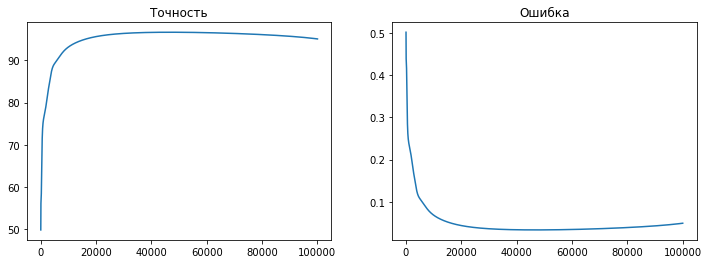

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.02
Количество эпох: 99999
Максимальная точность: 98.73124746215855
Минимальная ошибка: 0.01268752537841441


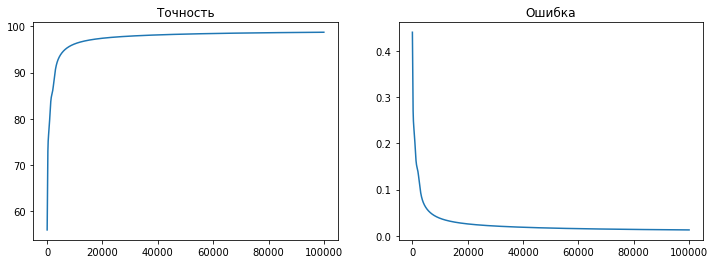

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.03
Количество эпох: 99999
Максимальная точность: 98.89484493763217
Минимальная ошибка: 0.011051550623678335


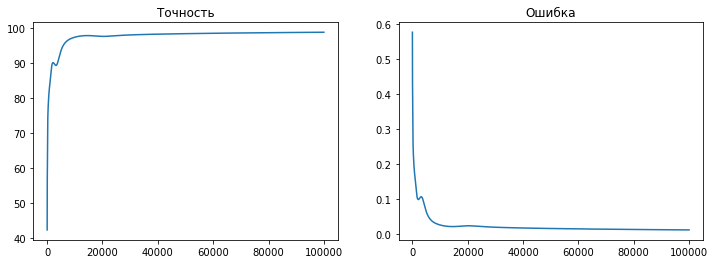

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.04
Количество эпох: 99999
Максимальная точность: 98.92288381087818
Минимальная ошибка: 0.010771161891218215


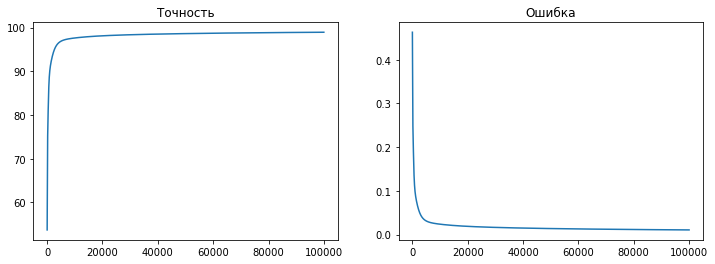

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.05
Количество эпох: 99999
Максимальная точность: 99.3624517713818
Минимальная ошибка: 0.006375482286182002


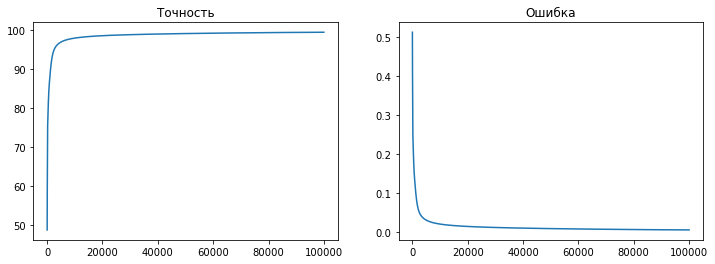

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.06
Количество эпох: 99999
Максимальная точность: 99.04444745145446
Минимальная ошибка: 0.009555525485455468


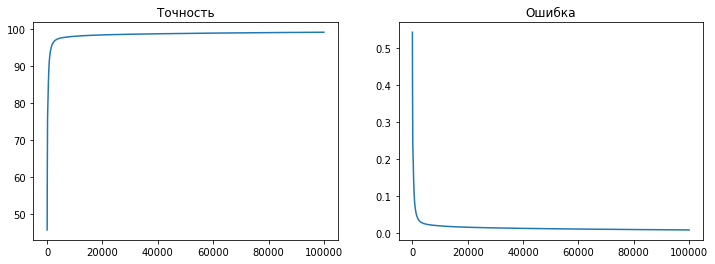

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.07
Количество эпох: 73031
Максимальная точность: 99.01006028245334
Минимальная ошибка: 0.009899397175466668


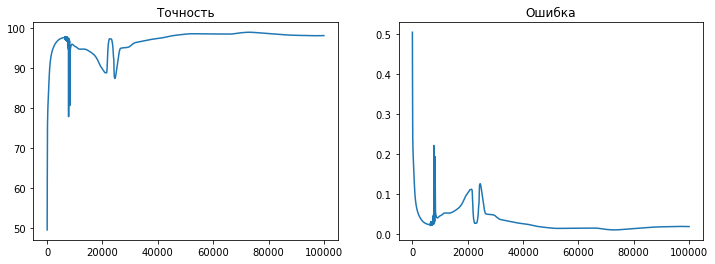

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.08
Количество эпох: 83866
Максимальная точность: 98.69651276851565
Минимальная ошибка: 0.013034872314843605


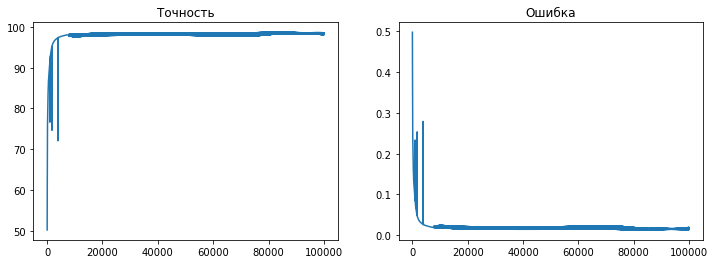

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.09
Количество эпох: 54001
Максимальная точность: 98.99787831009067
Минимальная ошибка: 0.010021216899093284


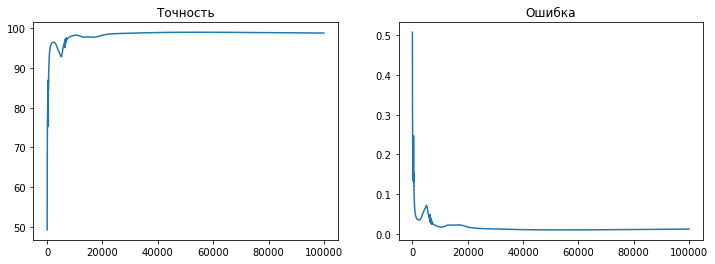

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.1
Количество эпох: 43452
Максимальная точность: 99.7682311753775
Минимальная ошибка: 0.0023176882462250196


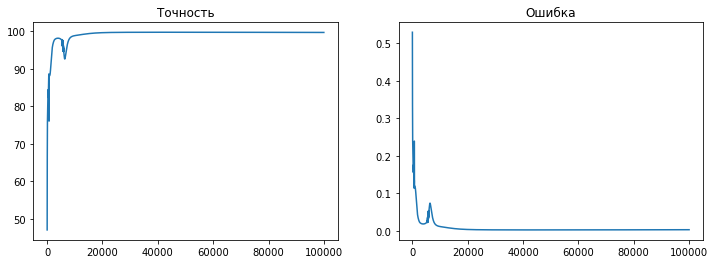

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.11
Количество эпох: 99999
Максимальная точность: 99.64055333254558
Минимальная ошибка: 0.003594466674544269


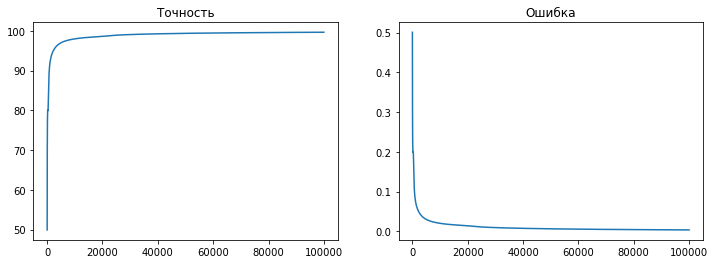

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.21
Количество эпох: 73926
Максимальная точность: 99.41004629618999
Минимальная ошибка: 0.005899537038100142


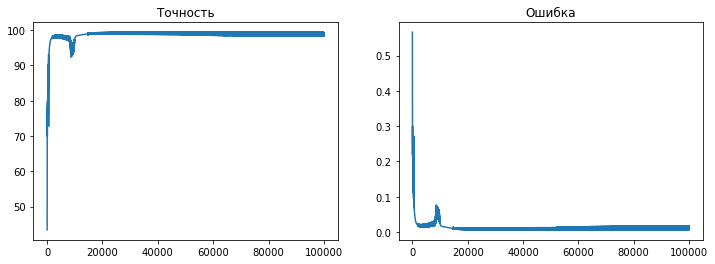

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.31
Количество эпох: 99430
Максимальная точность: 99.1990393496282
Минимальная ошибка: 0.008009606503718037


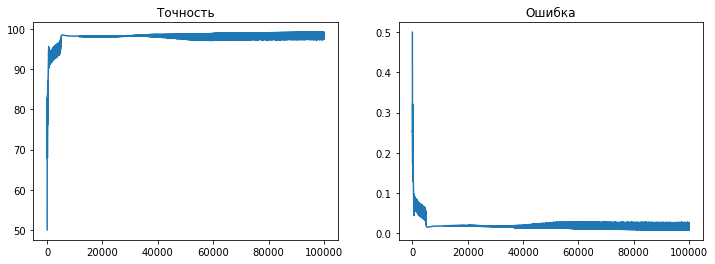

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.41
Количество эпох: 96217
Максимальная точность: 99.91442169539059
Минимальная ошибка: 0.0008557830460940726


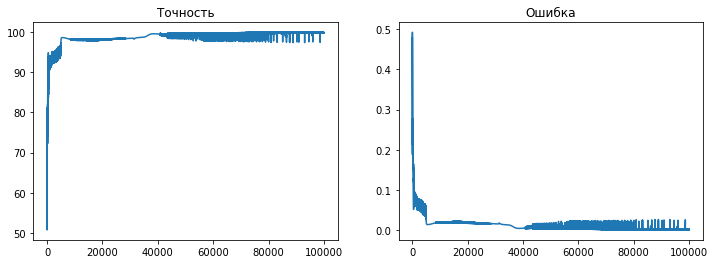

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.51
Количество эпох: 99999
Максимальная точность: 99.99336441582042
Минимальная ошибка: 6.635584179575133e-05


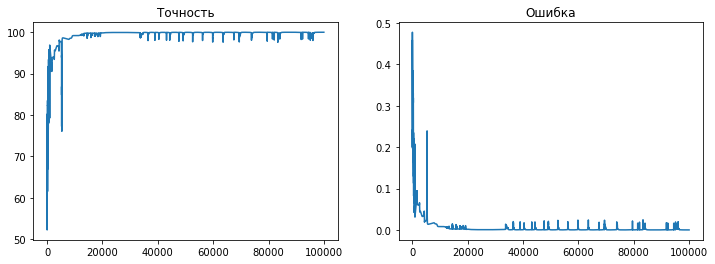

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.61
Количество эпох: 145
Максимальная точность: 83.96015620817778
Минимальная ошибка: 0.16039843791822228


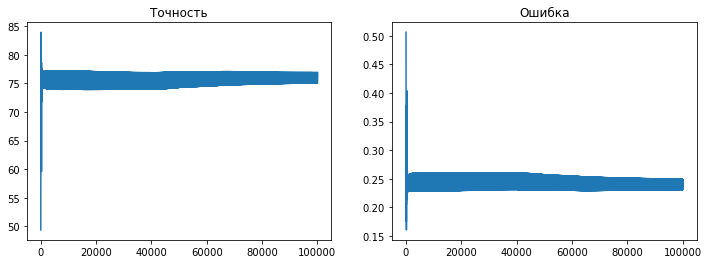

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.71
Количество эпох: 1
Максимальная точность: 66.13062189068219
Минимальная ошибка: 0.338693781093178


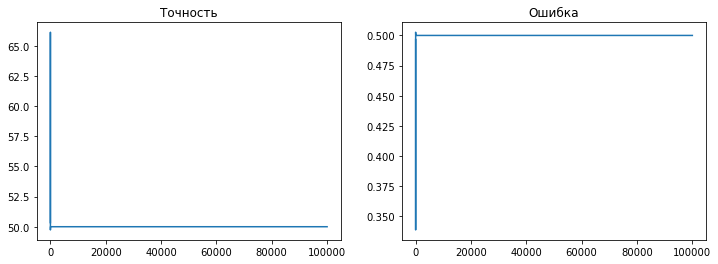

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.81
Количество эпох: 93
Максимальная точность: 83.86968469315565
Минимальная ошибка: 0.16130315306844353


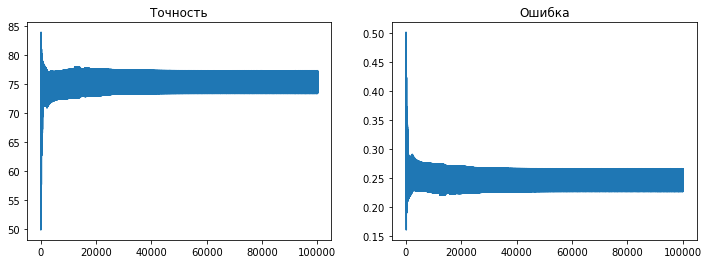

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.91
Количество эпох: 102
Максимальная точность: 84.56641793342503
Минимальная ошибка: 0.15433582066574972


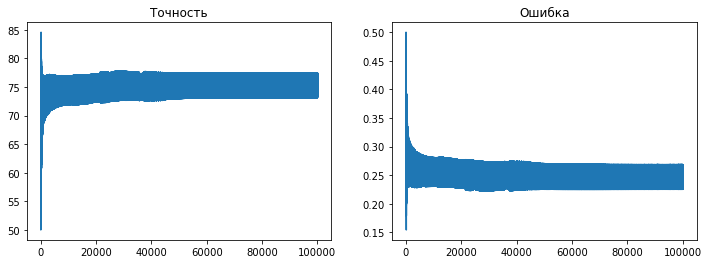

In [16]:
for i in range(len(ns)):
    if (i < 10 or i % 10 == 0):
        print('Значения при которых достигается минимальная ошибка и максимальная точность')
        print(f'Cкорость обучения: {ns[i]}')
        print(f'Количество эпох: {acs[i].index(max(acs[i]))}')
        print(f'Максимальная точность: {max(acs[i])}')
        print(f'Минимальная ошибка: {min(ers[i])}')
        
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(acs[i])
        plt.title('Точность')
        
        plt.subplot(1, 2, 2)
        plt.plot(ers[i])
        plt.title('Ошибка')
        plt.show()

Посмотрим значения точности и ошибки в зависимости от скорости обучения

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.66
Количество эпох: 0
Максимальная точность: 55.93721035511842
Минимальная ошибка: 0.44062789644881584


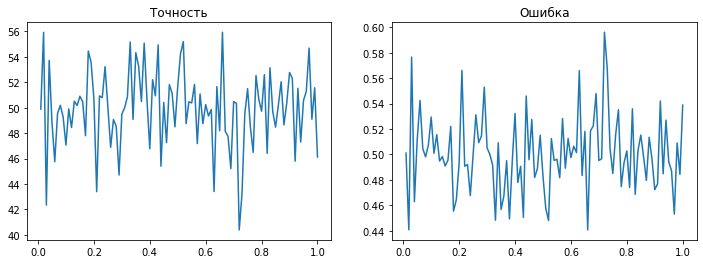

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.52
Количество эпох: 10000
Максимальная точность: 99.87142431066853
Минимальная ошибка: 0.001285756893314711


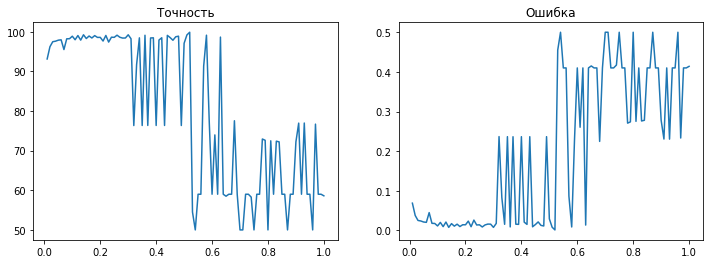

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.47
Количество эпох: 20000
Максимальная точность: 99.87969425850676
Минимальная ошибка: 0.0012030574149323832


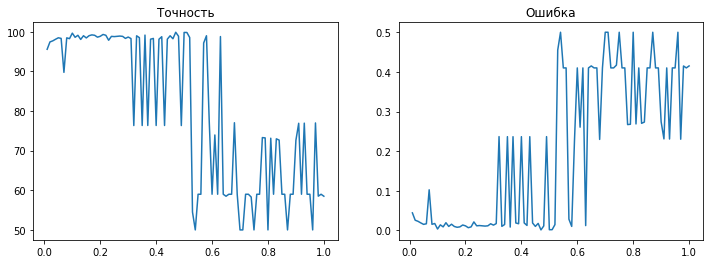

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.48
Количество эпох: 30000
Максимальная точность: 99.97191165773395
Минимальная ошибка: 0.0002808834226604662


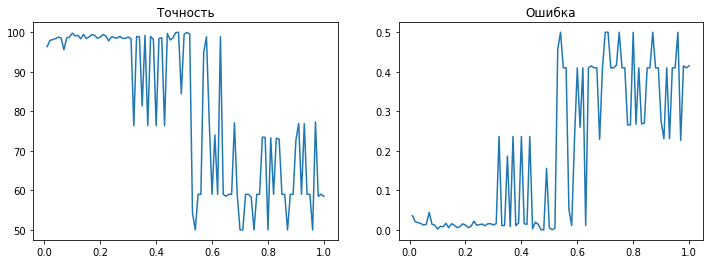

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.48
Количество эпох: 40000
Максимальная точность: 99.99538829648407
Минимальная ошибка: 4.611703515933004e-05


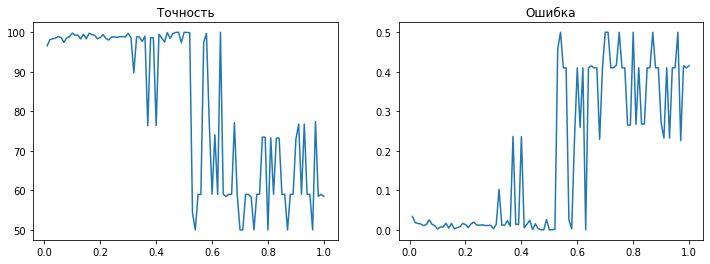

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.48
Количество эпох: 50000
Максимальная точность: 99.9956894056108
Минимальная ошибка: 4.310594389197734e-05


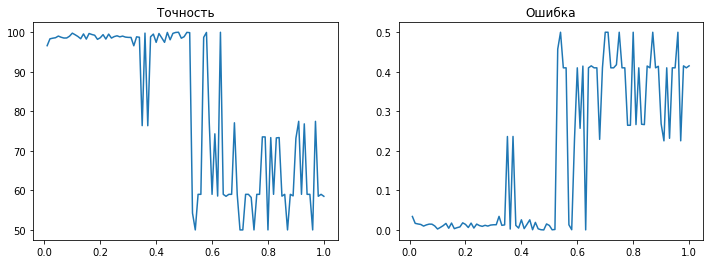

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.48
Количество эпох: 60000
Максимальная точность: 99.99575635048272
Минимальная ошибка: 4.243649517280751e-05


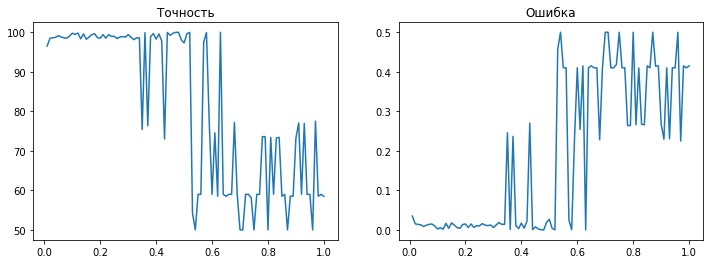

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.48
Количество эпох: 70000
Максимальная точность: 99.99565488106764
Минимальная ошибка: 4.34511893237434e-05


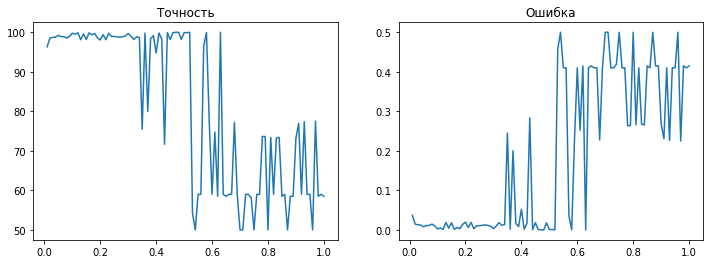

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.48
Количество эпох: 80000
Максимальная точность: 99.99534370970045
Минимальная ошибка: 4.65629029955636e-05


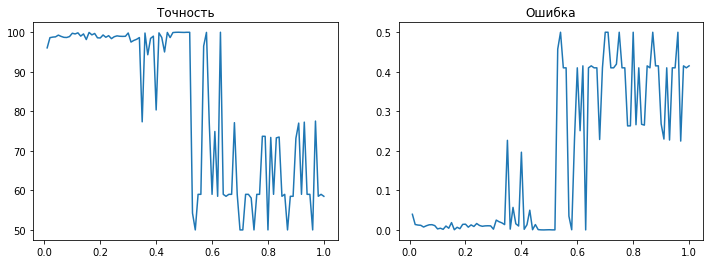

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.5
Количество эпох: 90000
Максимальная точность: 99.99868955022983
Минимальная ошибка: 1.310449770176784e-05


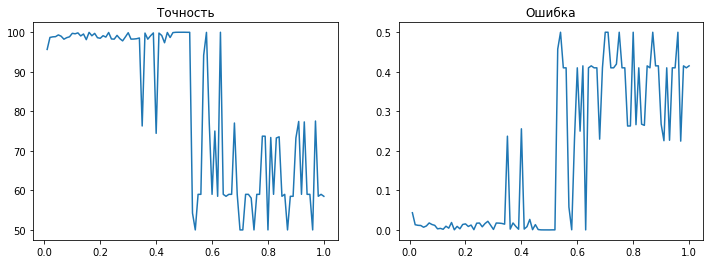

In [17]:
for j in range(len(acs[0])):
    if (j == 0 or j % 10000 == 0):
        res_acs = []
        res_ers = []
        for i in range(len(ns)):
            res_acs.append(acs[i][j])
            res_ers.append(ers[i][j])
            
        print('Значения при которых достигается минимальная ошибка и максимальная точность')
        print(f'Cкорость обучения: {ns[res_acs.index(max(res_acs))]}')
        print(f'Количество эпох: {j}')
        print(f'Максимальная точность: {max(res_acs)}')
        print(f'Минимальная ошибка: {min(res_ers)}')
        
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(ns, res_acs)
        plt.title('Точность')
        
        plt.subplot(1, 2, 2)
        plt.plot(ns, res_ers)
        plt.title('Ошибка')
        plt.show()

In [18]:
max = 0.
min = 100.
j = 0
index = -1
for i in range(len(ns)):
    if max < np.array(acs[i]).max():
        max = np.array(acs[i]).max()
        j = acs[i].index(max)
        index = i
    if min > np.array(ers[i]).min():
        min = np.array(ers[i]).min()

Cкорость обучения: 0.5
Количество эпох: 99999
Максимальная точность: 99.99959553181952
Минимальная ошибка: 4.044681804803131e-06


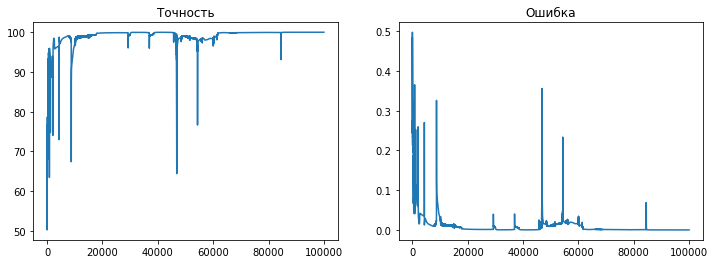

In [19]:
print(f'Cкорость обучения: {ns[index]}')
print(f'Количество эпох: {j}')
print(f'Максимальная точность: {max}')
print(f'Минимальная ошибка: {min}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acs[index])
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(ers[index])
plt.title('Ошибка')
plt.show()

**Выводы:**
1. Точность повышается, а ошибка становится меньше при увеличении количества эпох обучения и при уменьшении скорости обучения.
2. При росте скорости обучения решение перестает сходиться. Самое оптимальное значение скорости обучения около 0.2.
3. Задавать большое количество эпох обучения смысла не имеет, так как после 7000-10000 эпох точность перестает существенно увеличиваться и ошибка перестает уменьшаться. Задав меньшее количество эпох мы не снижая качества получим более быстрый процесс обучения.
4. Самое сильно влияние на сходимость оказывает начальный выбор весовых коэффициентов.